# Mapping counts of filtered, localized measurements

Argovis indexes and serves many kinds of localized Earth system data, from oceanic profiles to satellite surveys to gridded interpolations. In this notebook, we'll illustrate some simple techniques and helpers for quickly making maps that count the frequency of filtered datasets of interest.

Lets begin by mapping a count of all dissolved oxygen measurements from Argo BGC probes from 2021:

In [5]:
from argovisHelpers import helpers as avh
import datetime, pandas, matplotlib
import helpers

API_ROOT='https://argovis-api.colorado.edu/'
API_KEY=''

In [7]:
datafilter = {
    'startDate': '2020-01-01T00:00:00Z',
    'endDate': '2021-01-01T00:00:00Z',
    'data': 'doxy',
    'compression': 'minimal'
}

doxy = avh.query('argo', options=datafilter, apikey=API_KEY, apiroot=API_ROOT)

https://argovis-api.colorado.edu/argo?startDate=2020-01-01T00:00:00.000000Z&endDate=2020-01-31T00:00:00.000000Z&data=doxy&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-01-31T00:00:00.000000Z&endDate=2020-03-01T00:00:00.000000Z&data=doxy&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-03-01T00:00:00.000000Z&endDate=2020-03-31T00:00:00.000000Z&data=doxy&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-03-31T00:00:00.000000Z&endDate=2020-04-30T00:00:00.000000Z&data=doxy&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-04-30T00:00:00.000000Z&endDate=2020-05-30T00:00:00.000000Z&data=doxy&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-05-30T00:00:00.000000Z&endDate=2020-06-29T00:00:00.000000Z&data=doxy&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-06-29T00:00:00.000000Z&endDate=2020-07-29T00:00:00.000000Z&data=doxy&compression=minimal
https:

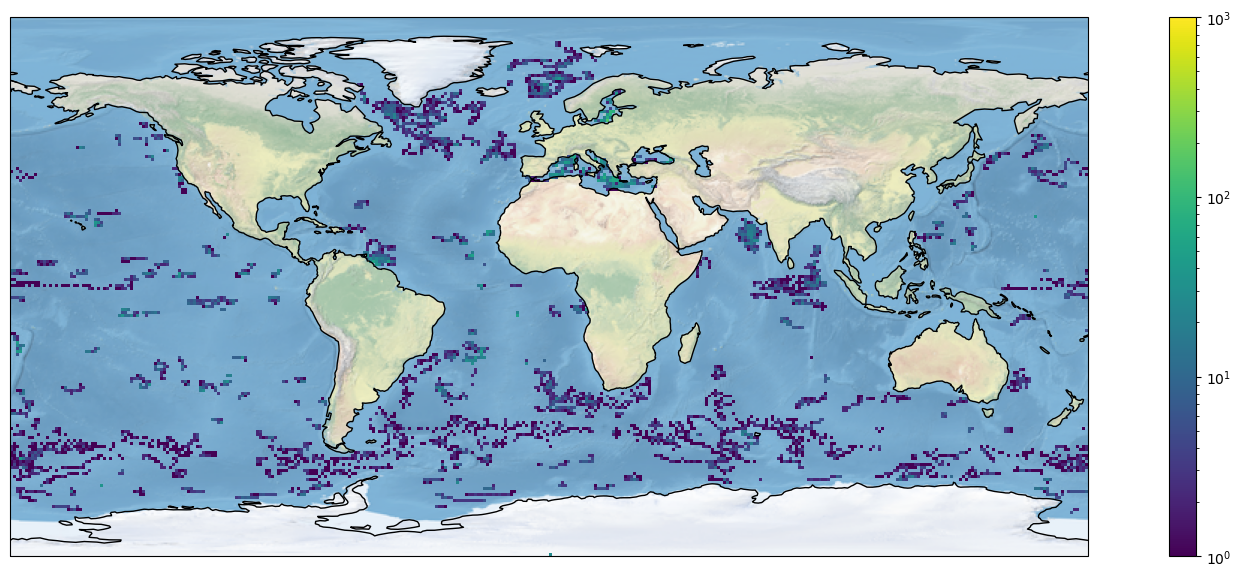

In [8]:
df = helpers.mapping_df(doxy)
helpers.map_count_in_bins(df,datafilter['startDate'],datafilter['endDate'])

Or we can do the same thing with a QC filter:

In [9]:
datafilter = {
    'startDate': '2020-01-01T00:00:00Z',
    'endDate': '2021-01-01T00:00:00Z',
    'data': 'doxy,1',
    'compression': 'minimal'
}

doxy = avh.query('argo', options=datafilter, apikey=API_KEY, apiroot=API_ROOT)

https://argovis-api.colorado.edu/argo?startDate=2020-01-01T00:00:00.000000Z&endDate=2020-01-31T00:00:00.000000Z&data=doxy,1&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-01-31T00:00:00.000000Z&endDate=2020-03-01T00:00:00.000000Z&data=doxy,1&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-03-01T00:00:00.000000Z&endDate=2020-03-31T00:00:00.000000Z&data=doxy,1&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-03-31T00:00:00.000000Z&endDate=2020-04-30T00:00:00.000000Z&data=doxy,1&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-04-30T00:00:00.000000Z&endDate=2020-05-30T00:00:00.000000Z&data=doxy,1&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-05-30T00:00:00.000000Z&endDate=2020-06-29T00:00:00.000000Z&data=doxy,1&compression=minimal
https://argovis-api.colorado.edu/argo?startDate=2020-06-29T00:00:00.000000Z&endDate=2020-07-29T00:00:00.000000Z&data=doxy,1&compression=

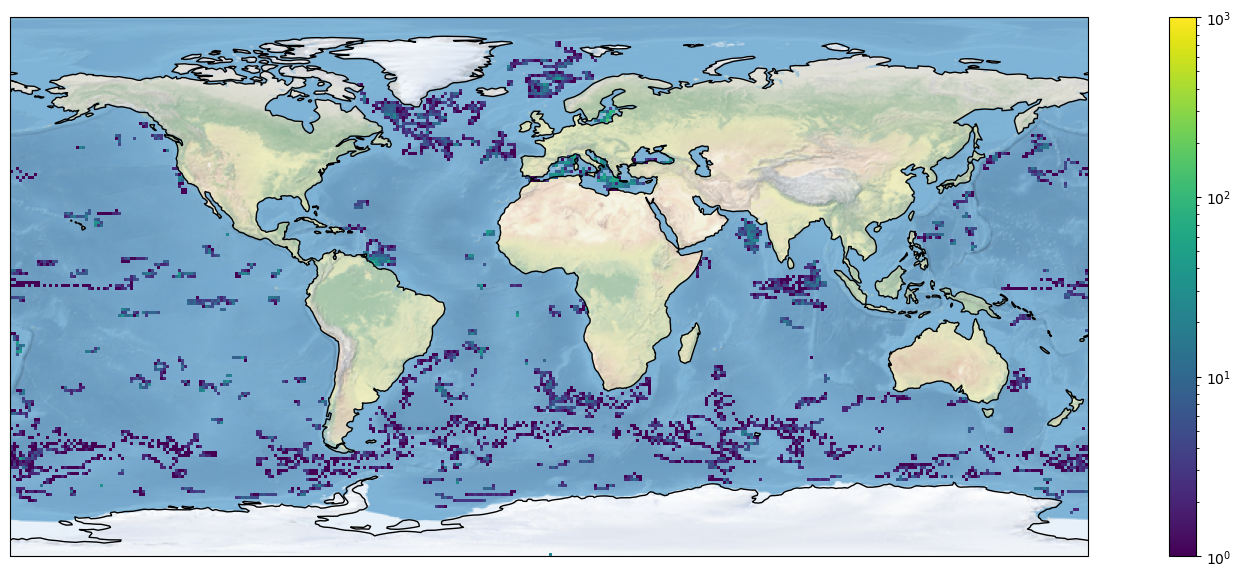

In [10]:
df = helpers.mapping_df(doxy)
helpers.map_count_in_bins(df,datafilter['startDate'],datafilter['endDate'])

We can similarly summarize these good-QC dissolved oxygen profiles in a timeseries:

<AxesSubplot:xlabel='timestamps,timestamps'>

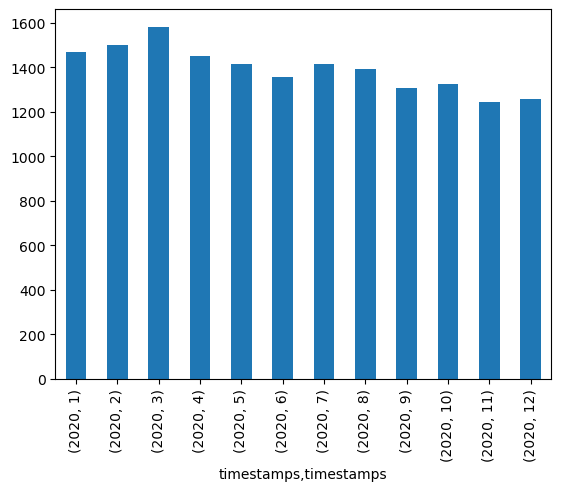

In [11]:
df['timestamps'].groupby([df["timestamps"].dt.year, df["timestamps"].dt.month]).count().plot(kind="bar")